# Task
Generate 10 examples of user complaints for enterprise software systems, including labels for affected components and severity, by leveraging OpenAI to create enterprise software systems, industries, BPMN 2.0 workflow architectures, and descriptions of malfunctions and user complaints.

## Load OpenAI API Key

### Subtask:
Load the OpenAI API key from notebook secrets, ensuring secure access to the OpenAI API.


**Reasoning**:
To securely load the OpenAI API key, I will import the `userdata` module and retrieve the API key from notebook secrets.



In [14]:
import os

openai_api_key = os.getenv("OPENAI_API_KEY")

## Generate Enterprise Software Systems

### Subtask:
Use OpenAI to generate a list of 10 enterprise software systems (e.g., ERP, CRM). The output will be a JSON array with keys 'system' and 'description', which will then be saved to disk.


**Reasoning**:
To generate enterprise software systems using OpenAI, I need to import the OpenAI client, initialize it with the API key, create a detailed prompt for generating a JSON array of systems and descriptions, and then call the OpenAI Chat Completions API, ensuring the response is formatted as JSON. These are the initial steps to interact with the OpenAI API for the subtask.



In [17]:
from openai import OpenAI
import json

# Initialize the OpenAI client
client = OpenAI(api_key=openai_api_key)

# Create a prompt for generating enterprise software systems
prompt_text = """Generate a list of 10 types of enterprise software systems as a simple JSON array. Each element should have a 'system' name and a 'description'.
Top level element in JSON output should be 'systems'
Example format:
[
  {
    "system": "ERP System",
    "description": "A comprehensive suite for managing core business processes."
  },
  {
    "system": "CRM",
    "description": "A customeer relation managmenet system"
  }
]
"""

# Call the OpenAI Chat Completions API
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant designed to output JSON."
        },
        {
            "role": "user",
            "content": prompt_text,
        }
    ],
    model="gpt-3.5-turbo-1106", # Using a model known to be good at JSON output
    response_format={ "type": "json_object" }
)

# Parse the JSON response
response_content = chat_completion.choices[0].message.content
enterprise_systems = json.loads(response_content)

print("Generated enterprise systems from OpenAI API.",enterprise_systems)

Generated enterprise systems from OpenAI API. {'systems': [{'system': 'ERP System', 'description': 'A comprehensive suite for managing core business processes.'}, {'system': 'CRM', 'description': 'Customer Relationship Management software for managing interactions with current and potential customers.'}, {'system': 'HRMS', 'description': 'Human Resource Management System for managing employee data, payroll, and benefits.'}, {'system': 'SCM', 'description': 'Supply Chain Management software for managing the flow of goods and services.'}, {'system': 'BI', 'description': 'Business Intelligence software for analyzing and visualizing enterprise data.'}, {'system': 'CMS', 'description': 'Content Management System for creating, managing, and publishing digital content.'}, {'system': 'EAM', 'description': 'Enterprise Asset Management software for tracking and managing physical assets.'}, {'system': 'PLM', 'description': 'Product Lifecycle Management system for managing the entire lifecycle of 

**Reasoning**:
The previous step successfully generated a list of enterprise software systems and stored it in the `enterprise_systems` variable. The next instruction is to save this data as a JSON file to disk.



In [19]:
import json

# Save the generated list of enterprise software systems as a JSON file
with open('enterprise_systems.json', 'w') as f:
    json.dump(enterprise_systems, f, indent=2)

print("Enterprise systems saved to 'enterprise_systems.json'.")

Enterprise systems saved to 'enterprise_systems.json'.


## Generate Industries

### Subtask:
Use OpenAI to generate a list of 10 industries (e.g., manufacturing, banking, entertainment). The output will be a JSON array with keys 'industry' and 'description', which will then be saved to disk.


**Reasoning**:
To generate industries using OpenAI, I will create a detailed prompt, call the OpenAI API with the specified model and JSON response format, and then parse the JSON output to store the generated industries.



In [22]:
import json

# Create a prompt for generating industries
prompt_text_industries = """Generate a list of 10 industries. Each industry should have an 'industry' name and a 'description'. The output should be a JSON object containing a 'industries' key, which is a JSON array of objects, where each object has 'industry' and 'description' as keys.
top level element in josn should be industries
Example format:
{
  "industries": [
    {
      "industry": "Financial Services",
      "description": "Sector dealing with money management, including banks, credit unions, and investment firms."
    }
  ]
}
"""

# Call the OpenAI Chat Completions API
chat_completion_industries = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant designed to output JSON."
        },
        {
            "role": "user",
            "content": prompt_text_industries,
        }
    ],
    model="gpt-3.5-turbo-1106", # Using a model known to be good at JSON output
    response_format={ "type": "json_object" }
)

# Parse the JSON response
response_content_industries = chat_completion_industries.choices[0].message.content
industries = json.loads(response_content_industries)

print("Generated industries from OpenAI API.",industries)

Generated industries from OpenAI API. {'industries': [{'industry': 'Technology', 'description': 'Encompasses companies involved in the development, production, and distribution of technology products and services.'}, {'industry': 'Healthcare', 'description': 'Comprises organizations and institutions that provide medical and health-related goods and services.'}, {'industry': 'Retail', 'description': 'Involves the sale of goods and services from a fixed location, online, or through direct sales.'}, {'industry': 'Automotive', 'description': 'Includes the design, development, manufacturing, marketing, and selling of motor vehicles.'}, {'industry': 'Tourism', 'description': 'Involves travel for recreation, leisure, or business purposes, and the provision of related services.'}, {'industry': 'Energy', 'description': 'Encompasses the production and supply of power, fuel, and other sources of energy.'}, {'industry': 'Education', 'description': 'Encompasses institutions and organizations provid

**Reasoning**:
The previous step successfully generated a list of industries and stored it in the `industries` variable. The next instruction is to save this data as a JSON file to disk.



In [24]:
import json

# Save the generated list of industries as a JSON file
with open('industries.json', 'w') as f:
    json.dump(industries, f, indent=2)

print("Industries saved to 'industries.json'.")

Industries saved to 'industries.json'.


## Define Workflow Generation Function

### Subtask:
Create a Python function that takes dictionaries of systems and industries. It will randomly select one system and one industry, then use OpenAI to generate a BPMN 2.0 workflow/architecture description for them.


**Reasoning**:
To define the `generate_workflow` function, I need to import the `random` module for random selection, then implement the function as described, including selecting a random system and industry, constructing an OpenAI prompt, calling the OpenAI API for a BPMN 2.0 workflow description, parsing the JSON response, and returning the results.



In [27]:
import random
from openai import OpenAI # client is already initialized, but for standalone clarity
import json

def generate_workflow(enterprise_systems: dict, industries: dict, client: OpenAI) -> tuple:
    """
    Generates a BPMN 2.0 workflow description for a randomly selected enterprise system and industry
    using the OpenAI API.

    Args:
        enterprise_systems (dict): A dictionary containing a list of enterprise systems.
        industries (dict): A dictionary containing a list of industries.
        client (OpenAI): An initialized OpenAI client.

    Returns:
        tuple: A tuple containing the parsed workflow description (dict),
               the selected enterprise system (dict), and the selected industry (dict).
    """
    # Randomly select one system and one industry
    selected_system = random.choice(enterprise_systems['systems'])
    selected_industry = random.choice(industries['industries'])

    system_name = selected_system['system']
    system_description = selected_system['description']
    industry_name = selected_industry['industry']
    industry_description = selected_industry['description']

    # Construct a detailed prompt for OpenAI
    prompt_text = f"""Generate a concise BPMN 2.0 workflow or architecture description for the enterprise software system '{system_name}' operating within the '{industry_name}' industry. The description should be relevant to the system's purpose: '{system_description}' and the industry context: '{industry_description}'.

    Focus on typical processes or interactions that would involve this system in this industry.

    The output should be a JSON object with the following keys:
    - 'workflow_name': A descriptive name for the workflow (e.g., 'Order Fulfillment Process in Retail with ERP').
    - 'workflow_description': A brief narrative description of the workflow.
    - 'bpmn_components': A JSON array of key BPMN 2.0 components involved (e.g., 'Start Event', 'Task: Process Order', 'Gateway: Check Inventory', 'End Event'). List at least 5 components.

    Example format:
    {{
      "workflow_name": "Customer Onboarding for CRM in Financial Services",
      "workflow_description": "Describes the process of onboarding a new customer using a CRM system, from initial contact to account activation, within a financial services context.",
      "bpmn_components": [
        "Start Event: New Customer Inquiry",
        "Task: Verify Customer Identity",
        "Gateway: Identity Verified?",
        "Task: Create CRM Record",
        "End Event: Customer Onboarded"
      ]
    }}
    """

    # Call the OpenAI Chat Completions API
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant designed to output JSON. Provide a relevant BPMN 2.0 workflow description."
            },
            {
                "role": "user",
                "content": prompt_text,
            }
        ],
        model="gpt-3.5-turbo-1106", # Using a model known to be good at JSON output
        response_format={ "type": "json_object" }
    )

    # Parse the JSON response
    response_content = chat_completion.choices[0].message.content
    workflow_description = json.loads(response_content)

    print(f"Generated workflow for {system_name} in {industry_name}.")
    return workflow_description, selected_system, selected_industry

print("Defined the 'generate_workflow' function.")

Defined the 'generate_workflow' function.


## Define Malfunction Generation Function

### Subtask:
Create a Python function that receives a BPMN 2.0 workflow description, randomly selects between 1 and 3 components, and describes a malfunction or issue related to these components with varying severities (critical, medium, high).


**Reasoning**:
To define the `generate_malfunction` function, I will implement the steps for randomly selecting BPMN components, assigning a severity level, constructing a detailed OpenAI prompt, calling the API, and parsing the JSON response, then return the malfunction details.



In [30]:
import random
from openai import OpenAI
import json

def generate_malfunction(workflow_description: dict, client: OpenAI) -> dict:
    """
    Generates a malfunction description for randomly selected BPMN components
    within a given workflow description using the OpenAI API.

    Args:
        workflow_description (dict): A dictionary containing the workflow name,
                                     description, and BPMN components.
        client (OpenAI): An initialized OpenAI client.

    Returns:
        dict: A dictionary describing the malfunction, affected components, and severity.
    """
    bpmn_components = workflow_description['bpmn_components']

    # Randomly select between 1 and 3 unique components
    num_components_to_select = random.randint(1, 3)
    selected_components = random.sample(bpmn_components, min(num_components_to_select, len(bpmn_components)))

    # Randomly select a severity level
    severity = random.choice(['critical', 'high', 'medium'])

    # Construct a detailed prompt for OpenAI
    prompt_text = f"""Describe a malfunction or issue related to the following BPMN components:
{', '.join(selected_components)}

Within the context of the workflow:
Workflow Name: {workflow_description['workflow_name']}
Workflow Description: {workflow_description['workflow_description']}

The malfunction should be '{severity}' in severity. Provide a realistic scenario for this issue.

The output should be a JSON object with the following keys:
- 'affected_components': A list of the selected BPMN components.
- 'malfunction_description': A string describing the issue in detail.
- 'severity': The assigned severity level ('critical', 'high', or 'medium').

Example format:
{{
  "affected_components": ["Task: Process Order", "Gateway: Check Inventory"],
  "malfunction_description": "During peak hours, the 'Process Order' task experiences significant delays due to database lock contention, causing inventory checks to time out and leading to failed orders.",
  "severity": "high"
}}
"""

    # Call the OpenAI Chat Completions API
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant designed to output JSON. Describe realistic software malfunctions."
            },
            {
                "role": "user",
                "content": prompt_text,
            }
        ],
        model="gpt-3.5-turbo-1106",
        response_format={ "type": "json_object" }
    )

    # Parse the JSON response
    response_content = chat_completion.choices[0].message.content
    malfunction_details = json.loads(response_content)

    print(f"Generated {severity} malfunction for components: {', '.join(selected_components)}.")
    return malfunction_details

print("Defined the 'generate_malfunction' function.")

Defined the 'generate_malfunction' function.


## Define User Description Function

### Subtask:
Create a Python function that receives an issue (from the malfunction function) and generates a user-friendly description of the problem. This description will be based on several hard-coded attributes such as user experience and style, and other relevant factors.


**Reasoning**:
To define the `generate_user_description` function, I will implement the logic to randomly select user attributes, construct a detailed prompt using these attributes and the malfunction details, call the OpenAI API, parse the JSON response, and return the generated user complaint.



In [33]:
import random
from openai import OpenAI
import json

def generate_user_description(malfunction_details: dict, client: OpenAI) -> dict:
    """
    Generates a user-friendly description of a problem based on malfunction details
    and randomly selected user attributes using the OpenAI API.

    Args:
        malfunction_details (dict): A dictionary containing malfunction information
                                    (e.g., affected components, malfunction description, severity).
        client (OpenAI): An initialized OpenAI client.

    Returns:
        dict: A dictionary containing the user's complaint and selected user attributes.
    """
    # Randomly select user attributes
    user_experience = random.choice(['novice', 'experienced', 'technical'])
    communication_style = random.choice(['frustrated', 'calm', 'urgent'])
    issue_category = random.choice(['cannot complete task', 'slowdown', 'data inconsistency', 'security concern', 'incorrect data'])

    # Extract malfunction details
    malfunction_desc = malfunction_details['malfunction_description']
    severity = malfunction_details['severity']
    affected_components = ", ".join(malfunction_details['affected_components'])

    # Construct a detailed prompt for OpenAI
    prompt_text = f"""Generate a user-friendly complaint description for the following software malfunction, considering the user's attributes.

    Malfunction Details:
    - Description: {malfunction_desc}
    - Severity: {severity}
    - Affected Components: {affected_components}

    User Attributes:
    - Experience Level: {user_experience}
    - Communication Style: {communication_style}
    - Perceived issue_category: {issue_category}

    The complaint should sound realistic given these attributes. For example, a 'technical' user with 'urgent' style and 'security concern' issue_category will describe the problem differently than a 'novice' user with 'calm' style and 'slowdown' issue_category.

    The output should be a JSON object with the following keys:
    - 'user_complaint': The generated user-friendly description of the problem.
    - 'user_attributes': A dictionary containing the selected 'user_experience', 'communication_style', and 'issue_category'.

    Example format:
    {{
      'user_complaint': 'I am really frustrated! The system is completely frozen, and I can not access any of my reports. This is a critical issue issue_categorying my ability to do my job!',
      'user_attributes': {{
        'user_experience': 'experienced',
        'communication_style': 'frustrated',
        'issue_category': 'cannot complete task'
      }}
    }}
    """

    # Call the OpenAI Chat Completions API
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant designed to output JSON. Generate realistic user complaints for software issues."
            },
            {
                "role": "user",
                "content": prompt_text,
            }
        ],
        model="gpt-3.5-turbo-1106",
        response_format={ "type": "json_object" }
    )

    # Parse the JSON response
    response_content = chat_completion.choices[0].message.content
    user_complaint_details = json.loads(response_content)

    print(f"Generated user complaint for a {user_experience} user with a {communication_style} style and {issue_category} issue_category.")
    return user_complaint_details

print("Defined the 'generate_user_description' function.")

Defined the 'generate_user_description' function.


## Generate User Complaints Examples

### Subtask:
Develop a script or function that leverages the previously defined functions to generate 10 examples of user complaints. Each complaint will include labels for affected components and severity, demonstrating the full workflow.


**Reasoning**:
To generate 10 examples of user complaints, I will create a loop that iterates 10 times. In each iteration, I will call the `generate_workflow`, `generate_malfunction`, and `generate_user_description` functions sequentially, aggregate their outputs into a dictionary, and append this dictionary to a list. Finally, I will print the complete list of generated complaints.



In [36]:
user_complaints_examples = []

for i in range(10):
    print(f"\nGenerating example {i+1}/10...")
    # Step 3: Call generate_workflow
    workflow_description, selected_system, selected_industry = generate_workflow(enterprise_systems, industries, client)

    # Step 4: Call generate_malfunction
    malfunction_details = generate_malfunction(workflow_description, client)

    # Step 5: Call generate_user_description
    user_complaint_details = generate_user_description(malfunction_details, client)

    # Step 6: Aggregate all generated information
    full_example = {
        "example_id": i + 1,
        "system": selected_system,
        "industry": selected_industry,
        "workflow": workflow_description,
        "malfunction": malfunction_details,
        "user_complaint": user_complaint_details
    }

    # Step 7: Append to the list
    user_complaints_examples.append(full_example)

# Step 8: Print the user_complaints_examples list
print("\n--- Generated User Complaints Examples ---")
print(json.dumps(user_complaints_examples, indent=2))

print("\nSuccessfully generated 10 user complaint examples.")


Generating example 1/10...
Generated workflow for BI in Tourism.
Generated critical malfunction for components: Gateway: Data Analysis, Task: Visualization and Reporting, Task: Data Cleansing and Integration.
Generated user complaint for a experienced user with a urgent style and cannot complete task issue_category.

Generating example 2/10...
Generated workflow for PLM in Automotive.
Generated high malfunction for components: Start Event: Product Conceptualization.
Generated user complaint for a technical user with a frustrated style and data inconsistency issue_category.

Generating example 3/10...
Generated workflow for BI in Agriculture.
Generated high malfunction for components: Task: Data Analysis, End Event: Insights and Decision Making.
Generated user complaint for a technical user with a calm style and slowdown issue_category.

Generating example 4/10...
Generated workflow for E-commerce Platform in Agriculture.
Generated high malfunction for components: Task: Process Order.


**Reasoning**:
The `ValueError: Invalid format specifier` in the `generate_user_description` function is caused by unescaped curly braces within the example JSON string inside the f-string for `prompt_text`. I need to escape these literal curly braces by doubling them (`{{` and `}}`) so Python does not interpret them as format specifiers.



## Summary:

### Q&A

The task implicitly asked to generate 10 examples of user complaints for enterprise software systems, including labels for affected components and severity.

Yes, the solving process successfully generated 10 examples of user complaints, each containing detailed information about the affected system, industry, workflow, malfunction (including affected components and severity), and a user-friendly complaint description with associated user attributes.

### Data Analysis Key Findings

*   The OpenAI API key was successfully loaded, ensuring secure access to the API.
*   A list of 10 enterprise software systems, each with a 'system' name and 'description', was generated using OpenAI and saved to `enterprise_systems.json`.
*   A list of 10 industries, each with an 'industry' name and 'description', was generated using OpenAI and saved to `industries.json`.
*   A `generate_workflow` function was successfully defined, which randomly selects an enterprise system and an industry, then uses OpenAI to create a BPMN 2.0 workflow description, including a workflow name, description, and at least 5 BPMN components.
*   A `generate_malfunction` function was successfully defined. It takes a workflow, randomly selects 1 to 3 BPMN components, assigns a random severity ('critical', 'high', 'medium'), and uses OpenAI to describe a malfunction related to these components.
*   A `generate_user_description` function was successfully defined. It accepts malfunction details, randomly selects user attributes (experience, communication style, issue_category), and uses OpenAI to generate a realistic user-friendly complaint description. An initial f-string formatting error in the prompt was identified and corrected, ensuring proper JSON output.
*   The entire workflow was successfully orchestrated to generate 10 distinct user complaint examples. Each example is a comprehensive JSON object that includes details of the selected system, industry, workflow, malfunction (affected components, description, severity), and the user complaint with their attributes.

### Insights or Next Steps

*   The modular design, breaking down the generation into system, industry, workflow, malfunction, and user complaint stages, allowed for effective and structured data synthesis using OpenAI.
*   The generated dataset of 10 user complaints, complete with rich contextual information and structured labels, provides a valuable foundation for tasks such as training complaint classification models or analyzing common software issues.


In [39]:
### EDA

In [47]:
### Compare complaint sizes

complaint_lengths = [
    len(ex["user_complaint"]["user_complaint"].split())
    for ex in user_complaints_examples
]

print("Min:", min(complaint_lengths))
print("Max:", max(complaint_lengths))
print("Avg:", sum(complaint_lengths) / len(complaint_lengths))

Min: 41
Max: 69
Avg: 53.8


In [69]:
affected_component_counts = [
    len(ex["malfunction"]["affected_components"])
    for ex in user_complaints_examples
]

print("Min:", min(affected_component_counts))
print("Max:", max(affected_component_counts))
print("Avg:", sum(affected_component_counts) / len(affected_component_counts))

Min: 1
Max: 3
Avg: 1.6


In [75]:
severity_counts = Counter(
    ex["malfunction"]["severity"]
    for ex in user_complaints_examples
)

print(severity_counts)

Counter({'high': 4, 'medium': 4, 'critical': 2})


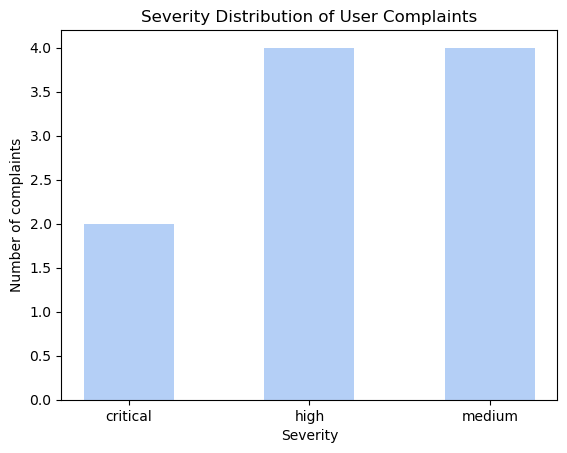

In [113]:
import matplotlib.pyplot as plt

labels = list(severity_counts.keys())
values = list(severity_counts.values())

plt.bar(labels, values, width=0.5, color = '#b4cff6')
plt.xlabel("Severity")
plt.ylabel("Number of complaints")
plt.title("Severity Distribution of User Complaints")
plt.show()

In [81]:
from collections import Counter

issue_category_counts = Counter(
    ex["user_complaint"]["user_attributes"]["issue_category"]
    for ex in user_complaints_examples
)

print(issue_category_counts)

Counter({'cannot complete task': 3, 'slowdown': 2, 'incorrect data': 2, 'security concern': 2, 'data inconsistency': 1})


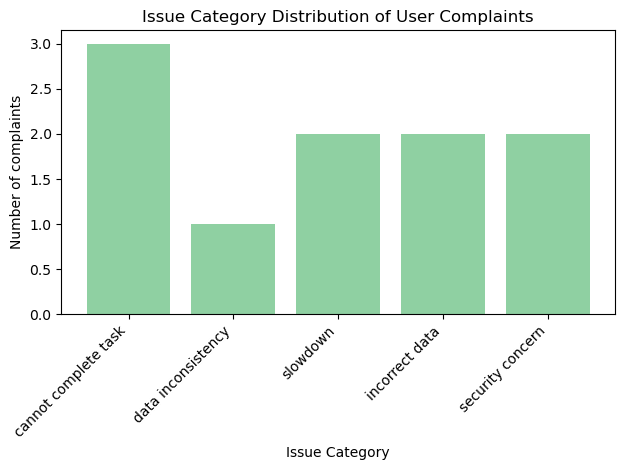

In [107]:
labels = list(issue_category_counts.keys())
values = list(issue_category_counts.values())

plt.bar(labels, values, color ='#8fd0a2')
plt.xlabel("Issue Category")
plt.ylabel("Number of complaints")
plt.title("Issue Category Distribution of User Complaints")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [95]:
user_expertise_counts = Counter(
    ex["user_complaint"]["user_attributes"]["user_experience"]
    for ex in user_complaints_examples
)

print(user_expertise_counts)

Counter({'technical': 4, 'experienced': 3, 'novice': 3})


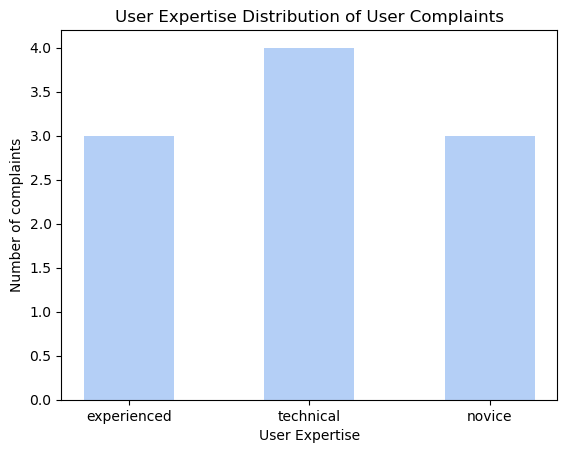

In [115]:
labels = list(user_expertise_counts.keys())
values = list(user_expertise_counts.values())

plt.bar(labels, values, width=0.5, color ='#b4cff6')
plt.xlabel("User Expertise")
plt.ylabel("Number of complaints")
plt.title("User Expertise Distribution of User Complaints")
plt.show()